#### Product Combination Analysis Using Apriori

In [12]:
# Importing Libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
# Loading Datasets and Filtering the required columns
orders_prior_df = pd.read_csv('./datasets/order_items__prior.csv',nrows=100000)
orders_prior_df = orders_prior_df.drop(columns=['add_to_cart_order','reordered'])

products_df = pd.read_csv('./datasets/product_catalog.csv')
products_df = products_df.drop(columns=['aisle_id','department_id'])

# Final Dataframe
orders_prior_df = orders_prior_df.merge(products_df,on='product_id')
orders_prior_df.head()


,order_id,product_id,product_name
0,2,33120,Organic Egg Whites
1,2,28985,Michigan Organic Kale
2,2,9327,Garlic Powder
3,2,45918,Coconut Butter
4,2,30035,Natural Sweetener


In [7]:
# Generating list of items bought in a order
items_list = orders_prior_df.groupby('order_id')['product_name'].apply(list).reset_index()
items_list.head()

,order_id,product_name
0,2,"[Organic Egg Whites, Michigan Organic Kale, Ga..."
1,3,[Total 2% with Strawberry Lowfat Greek Straine...
2,4,"[Plain Pre-Sliced Bagels, Honey/Lemon Cough Dr..."
3,5,"[Bag of Organic Bananas, Just Crisp, Parmesan,..."
4,6,"[Cleanse, Dryer Sheets Geranium Scent, Clean D..."


In [8]:
# Converting dataset into boolean format 
# where True = product purchased, False = not purchased
te = TransactionEncoder()
te_arry = te.fit_transform(items_list['product_name'])
df = pd.DataFrame(te_arry,columns =te.columns_)
df.head()

,#2 Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Black Cherry Greek Yogurt y,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Fat Superfruits Greek Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,...,of Hanover 100 Calorie Pretzels Mini,of Norwich Original English Mustard Powder Double Superfine,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,w/Banana Pulp Free Juice,with Crispy Almonds Cereal,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Applying Apriori
frequent_itemset =apriori(df,min_support=0.01,use_colnames=True)
frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x:len(x))
frequent_itemset

,support,itemsets,length
0,0.012041,(100% Raw Coconut Water),1
1,0.018362,(100% Whole Wheat Bread),1
2,0.012242,(2% Reduced Fat Milk),1
3,0.026992,(Apple Honeycrisp Organic),1
4,0.018964,(Asparagus),1
...,...,...,...
111,0.018663,"(Banana, Organic Strawberries)",2
112,0.013345,"(Banana, Strawberries)",2
113,0.012543,"(Organic Baby Spinach, Organic Strawberries)",2
114,0.011640,"(Organic Hass Avocado, Organic Strawberries)",2


In [10]:
# Generating Rules
# Using 'confidence and 'lift' to filter meaningful rules
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1.0)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
26,(Organic Raspberries),(Organic Strawberries),0.010034,0.233100,2.948067
27,(Organic Strawberries),(Organic Raspberries),0.010034,0.126904,2.948067
9,(Honeycrisp Apple),(Banana),0.010134,0.385496,2.592345
8,(Banana),(Honeycrisp Apple),0.010134,0.068151,2.592345
5,(Organic Raspberries),(Bag of Organic Bananas),0.013145,0.305361,2.523409
4,(Bag of Organic Bananas),(Organic Raspberries),0.013145,0.108624,2.523409
14,(Organic Fuji Apple),(Banana),0.010134,0.363309,2.443145
15,(Banana),(Organic Fuji Apple),0.010134,0.068151,2.443145
2,(Bag of Organic Bananas),(Organic Hass Avocado),0.018964,0.156716,2.440368
3,(Organic Hass Avocado),(Bag of Organic Bananas),0.018964,0.295313,2.440368


Network Graph

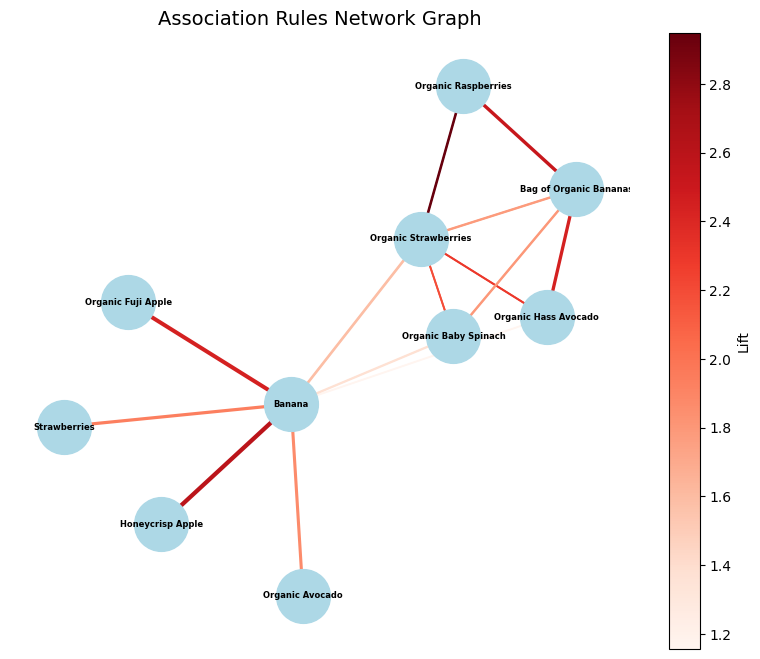

In [73]:
top_rules = rules.sort_values('lift', ascending=False)

G = nx.DiGraph()
for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent,
                       weight=row['confidence'],
                       lift=row['lift'])
            
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)  

edge = G.edges(data= True)
edge_width = [d['weight']*8 for _,_, d in edge]
edge_color = [d['lift'] for _,_,d in edge]
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue',ax=ax)

nx.draw_networkx_edges(G, pos, 
                       edge_color = edge_color,
                       edge_cmap = plt.cm.Reds,
                       width = edge_width,
                       ax = ax)

nx.draw_networkx_labels(G, pos, font_size=6,font_weight='bold' )
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, 
                           norm=plt.Normalize(vmin=min(edge_color), vmax=max(edge_color)))
sm.set_array([])
plt.colorbar(sm,ax= ax, label='Lift')
plt.title('Association Rules Network Graph', fontsize=14)
plt.axis('off')
plt.show()
